<h1><b>Digit Classification With Neural Networks<h1>
<h5>The following program trains a neural network to recognize the digits 0 through 9. The network is built using the Tensorflow library.




<h3><b> Import Statements

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

<h3><b> Reading in the dataset
<h5>The model will be trained using the MNIST digits classification dataset provided by Keras.

In [ ]:
# read the data and split it into training and testing datasets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path = "mnist.npz")

# determine number of training images as well as image dimensions
train_images.shape

(60000, 28, 28)

<h5> The shape of the training images states that one image is 28 by 28 pixels. This means that one image is 28 x 28 = 784 pixels

<h3><b> Visualzing the training images
<h5> Before building the model, its helpful to understand what the digits look like in image form.

In [ ]:
# prompts for user input, prints out the training image corresponding to the index. If index is invalid, prompts the user again.
def visualize_digit():
  index = int(input("Pick an image index: "))
  if valid_index_train_image(index):
    plt.figure()
    plt.imshow(train_images[index])
    plt.colorbar()
    plt.grid(False)
    plt.show()
  else:
    print("Invalid index, please try again.")
    visualize_digit()

# checks to see if the inputed index is a valid index
def valid_index_train_image(int):
  if 0 <= int <= 59999:
    return True
  else:
    return False

Pick an image index: 567


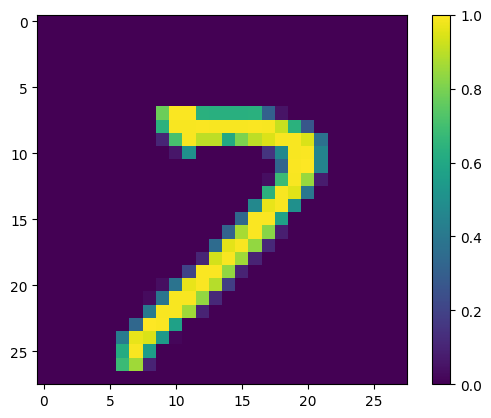

In [ ]:
visualize_digit()

<h3><b>Building the model
<h5>Before building the model, the images should be scaled down. Each pixel has a grayscale value between 0-255 as read from the description given by Keras. These values should be reduced to minimze the complexity of the network

In [ ]:
# scale down the training and testing images
train_images = train_images / 255
test_images = test_images / 255

<h5> Building a neural network for this task is slightly ambiguous with respect to its architecture. For good practice, the model is first designed with one hidden layer along with the input and output layers.

The input layer contains 784 neurons, one for each pixel in an image. The output layer will contain 10 neurons, one for each digit from 0 - 9. These will correspond to the class names defined below. The hidden layer should contain around 100-200 neurons. This can be adjusted when the model is trained

In [ ]:
# create class names
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

<h5><b>Activation functions
<h5>For a three-layered neural network, two activation functions are needed. The hidden layer will use Relu - rectified linear unit. For the output layer, the activation function will be softmax. This is because the model is predicting one out of 10 digits. Softmax can produce a probability distribution over the 10 digits, and the digit with the highest probability would be the model's prediction.

In [ ]:
# build the architecture of the neural network with hiden layer = 150 neurons for now
model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(150, activation = 'relu'),
     keras.layers.Dense(10, activation = 'softmax')])

<h5><b>Optimizer and Loss Function
<h5>Before training the model, it needs to be optimized, as well as have a loss function to improve the overall accuracy of the model. Adam is chosen as the optimizer. For the loss function, since this program predicts between multiple classes, sparse_categorical_crossentropy will be used.



In [ ]:
# compile and optimize the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

<h3><b>Training and testing the model
<h5>Training the model is a supervised learning task. This means after each training round, the accuracy can be improved by adjusting the model. These adjustments can include changing the activation functions, the number of neurons in the hidden layer, adding layers, or changing the number of epochs to account for over and under fitting.

In [ ]:
# train and test the model using 1 epoch. Produce the test accuracy
model.fit(train_images, train_labels, epochs = 1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9788
0.9787999987602234


<h5> The test accuracy produced by the model is slightly lower than the accuracy for the training sets; however, the difference is slight and the accuracy is still high. For 1 epoch, 5 epochs, or 10 epochs, the test accuracy is around 0.98. Overfitting or underfitting doesn't seem to be a problem with this model.

<h5> We can make predictions on testing images to see if reliable responses are produced.

In [ ]:
# make predictions on the testing images
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# check shape to see the number of test images
test_images.shape

(10000, 28, 28)

In [ ]:
def produce_prediction():
  index = int(input("Pick an image index: "))
  if valid_index_test_image(index):
    plt.figure()
    plt.imshow(test_images[index])
    plt.xlabel("Prediction: " + class_names[np.argmax(predictions[index])])
    plt.show()
  else:
    print("Please input a valid index.")
    produce_prediction()

def valid_index_test_image(int):
  if 0 <= int <= 9999:
    return True
  else:
    return False

Pick an image index: 3456


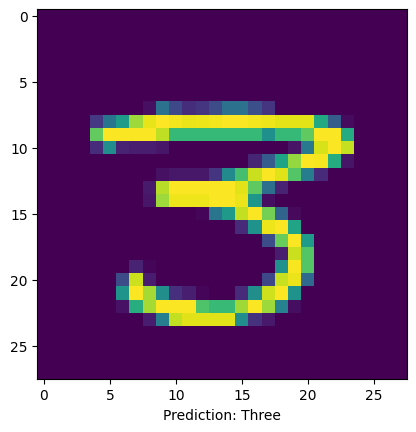

In [ ]:
produce_prediction()